## Imports

In [30]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.4f}'.format

In [31]:
dataset_names =  ['Yakutia', 'Malaga', 'Alemana']
scores = ['MSE', 'MAE', 'R2']
params = ['pred', 'opt']
tests = ['cross_val', 'test']

score_labels = {'MSE': 'Error Cuadrático Medio (MSE)',
               'MAE': 'Error Absoluto Medio (MAE)',
               'R2': 'Puntaje $R^2$ (Recortado en 0 mín.)'}

param_labels = {'pred': 'predeterminados',
                'opt': 'óptimos'}

test_labels = {'cross_val': 'validación cruzada',
               'test': 'conjunto de prueba'}

In [32]:
def draw_graph(dataset, score, test, param):
    fig, ax = plt.subplots(figsize=(14, 14))
    fig_df = pd.read_csv('./{}_{}_{}_{}_hyper.csv'.format(dataset, score, test, param), index_col=0)

    ax = sns.heatmap(fig_df.clip(lower=0, upper=1).round(decimals=2), annot=True, cmap=sns.color_palette('flare', as_cmap=True), cbar_kws={'label': score_labels[score]})
    ax.set_title('Resultados obtenidos en {} de dataset {}, hiperparámetros {}'.format(test_labels[test], dataset, param_labels[param]), fontsize = 16)
    ax.set_xlabel('Algoritmo usado', fontsize = 14)
    ax.set_ylabel('Fold usado para entrenar modelo', fontsize = 14)
    ax.figure.axes[-1].yaxis.label.set_size(14)

    fig.savefig('./figures/{}_{}_{}_{}_hyper.png'.format(dataset, score, test, param))
    plt.show()

In [33]:
def draw_comparison(dataset, score, test):
    df = pd.DataFrame()
    
    for param in params:
        df[param_labels[param]] = pd.read_csv('./{}_{}_{}_{}_hyper.csv'.format(dataset, score, test, param), index_col=0).mean()
    
    fig, ax = plt.subplots(figsize=(7, 14))    
    ax = sns.heatmap(df.clip(lower=0), annot=True, cmap=sns.color_palette('flare', as_cmap=True), cbar_kws={'label': score_labels[score]})
    ax.set_title('Comparación resultados\n de {} en dataset {}'.format(test_labels[test], dataset), fontsize = 16)
    ax.set_xlabel('Hiperparámetros usados', fontsize = 14)
    ax.set_ylabel('Algoritmo evaluado', fontsize = 14)

    fig.savefig('./figures/comparison_{}_{}_{}_hyper.png'.format(dataset, score, test))    
    plt.show()

In [44]:
def draw_comparison_sum(dataset, test):
    fig, axes = plt.subplots(1, 3, figsize=(6 * len(scores), 12))

    for i, score in zip(range(0, 3), scores):
        df = pd.DataFrame()

        for param in params:
            df[param_labels[param]] = pd.read_csv('./{}_{}_{}_{}_hyper.csv'.format(dataset, score, test, param), index_col=0).mean()
        
        sns.heatmap(df.clip(lower=0),
                    ax=axes[i], 
                    annot=True,
                    fmt='.5f', 
                    cmap=sns.color_palette('flare', as_cmap=True), 
                    cbar_kws={'label': score_labels[score]}, 
                    square=True,
                    annot_kws={'fontsize': 'large', 'fontweight': 'medium'})
        axes[i].set_yticklabels(axes[i].get_yticklabels(), rotation = 90, va='center')
        axes[i].figure.axes[-1].yaxis.label.set_size(14)
        axes[i].figure.axes[-1].set_yticklabels(axes[i].figure.axes[-1].get_yticklabels(), rotation=90, va='center')
        

    plt.suptitle('Comparación resultados de {} en dataset {}'.format(test_labels[test], dataset), fontsize = 24)
    fig.savefig('./figures/comparison_{}_{}_hyper.png'.format(dataset, test))   
    plt.show()


In [35]:
for dataset in dataset_names:
    for param in params:
        for test in tests:
            for score in scores:
                draw_graph(dataset, score, test, param)


In [36]:
for dataset in dataset_names:
    for test in tests:
        for score in scores:
            draw_comparison(dataset, score, test)

<ipython-input-44-43a8179ebf2e>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].figure.axes[-1].set_yticklabels(axes[i].figure.axes[-1].get_yticklabels(), rotation=90, va='center')


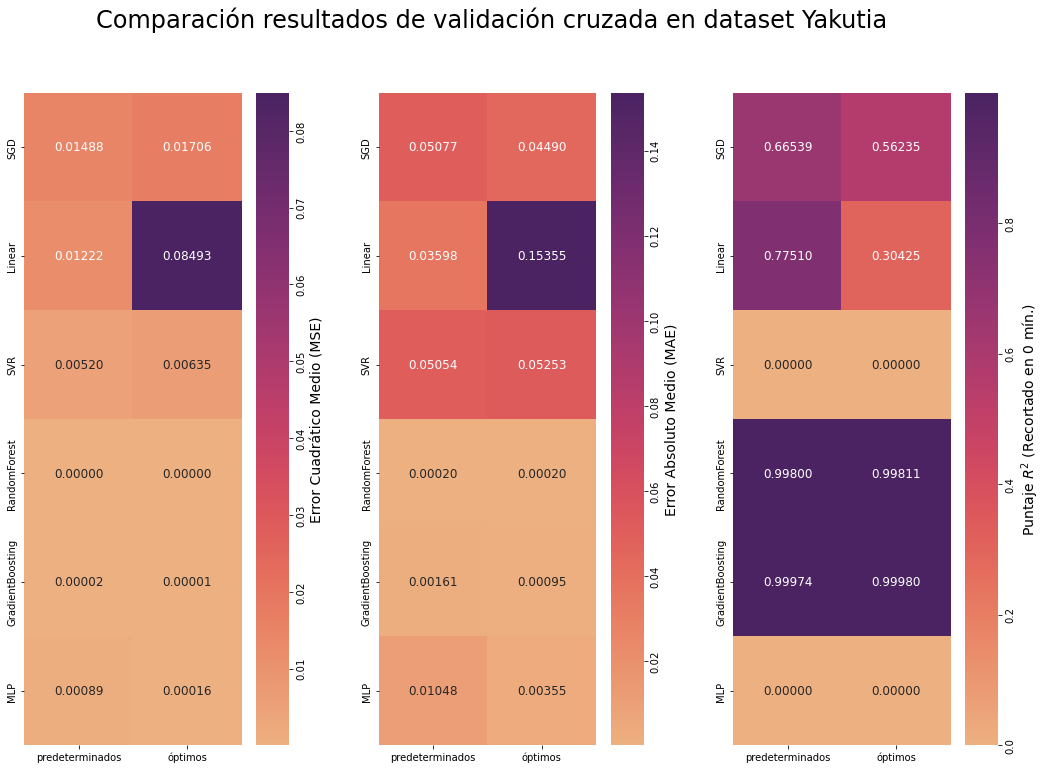

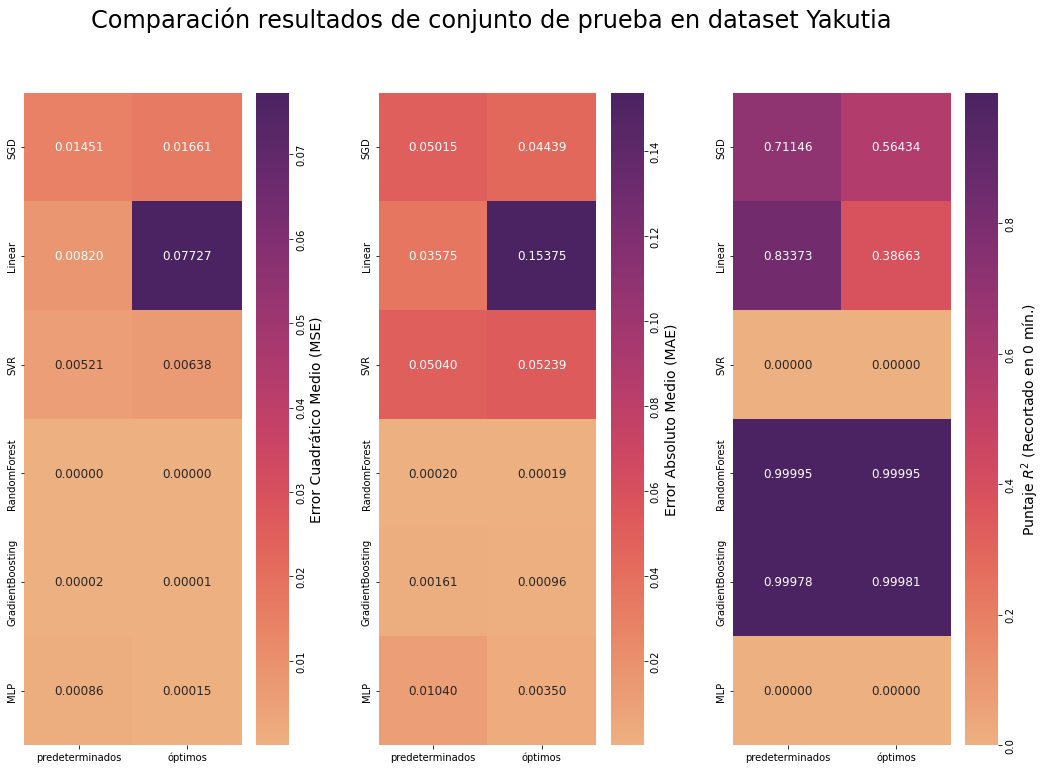

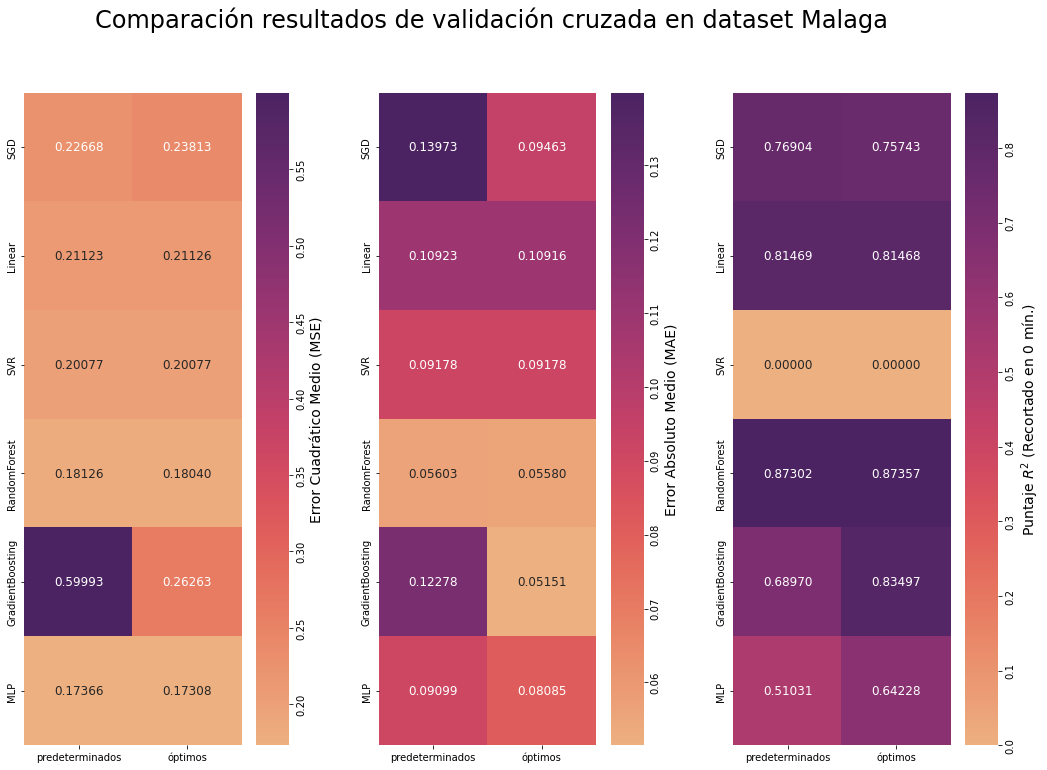

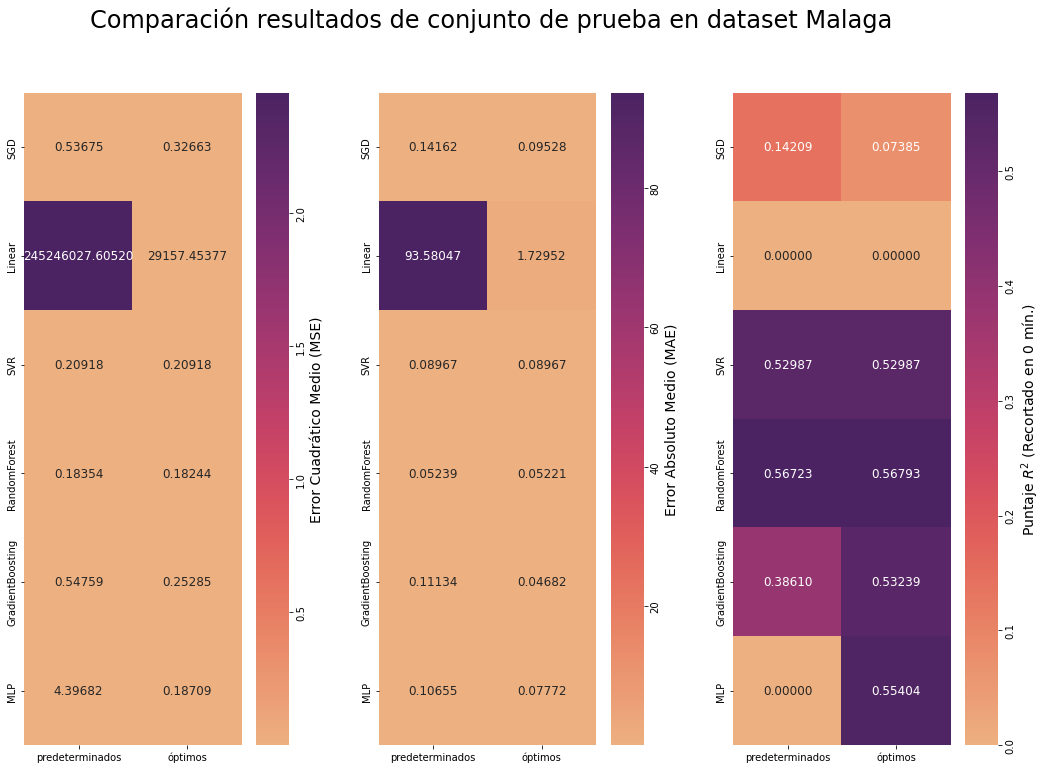

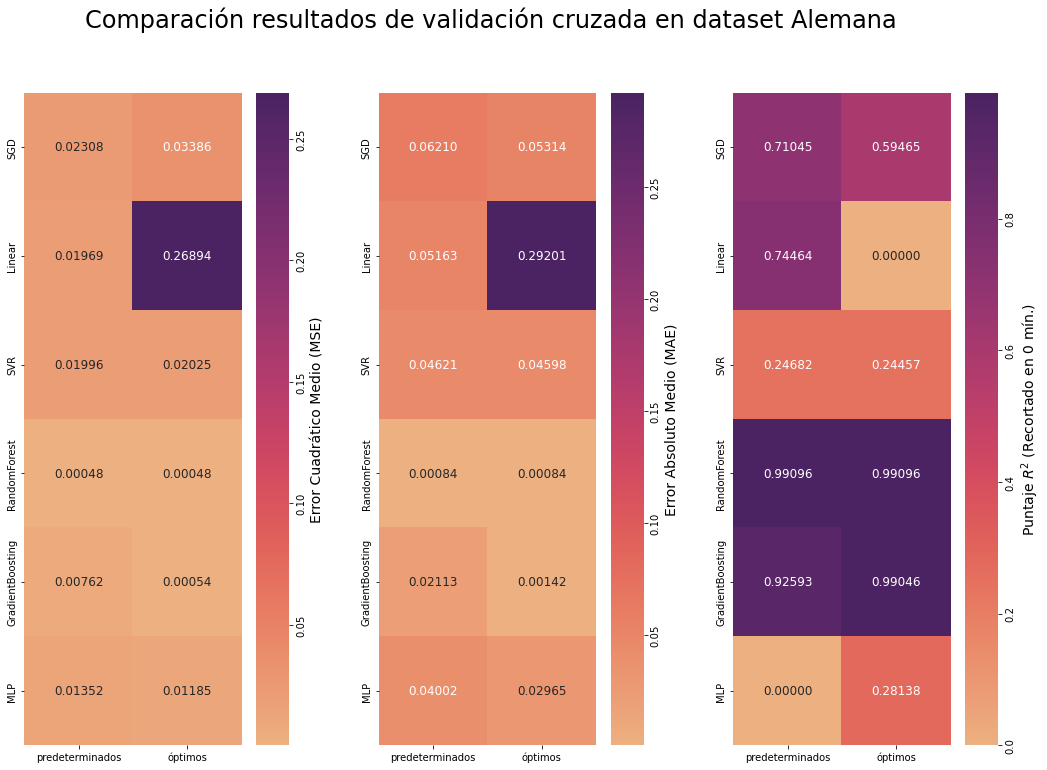

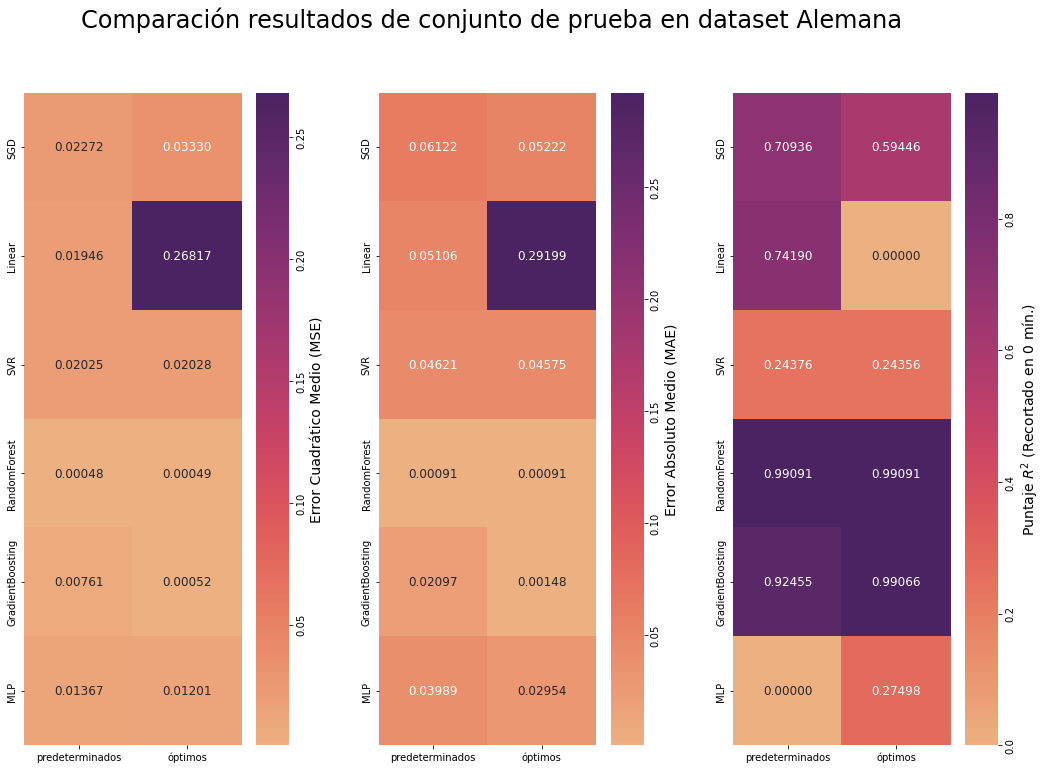

In [45]:
for dataset in dataset_names:
    for test in tests:
        draw_comparison_sum(dataset, test)